S04_T02 Visualització_de_Múltiples_Variables
---
![Tree](tree2.jpg)
*PART_1*

# EXERCICI_1

DATA_EXPLORATION
---

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
# DATAFRAME
tips = pd.read_csv('tips.csv')
tips[::40] # muestra el dataframe de 40 en 40

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3
80,19.44,3.00,Male,Yes,Thur,Lunch,2
120,11.69,2.31,Male,No,Thur,Lunch,2
160,21.50,3.50,Male,No,Sun,Dinner,4
200,18.71,4.00,Male,Yes,Thur,Lunch,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


## NUMERICAL DATA
---

> Podemos ver que los tipos de datos son los correctos y no supondrán un problema en el momento de graficar  
o realizar cálculos.

In [28]:
# Checking dataset variables
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

> La forma del dataset es de 244 filas por 7 columnas.

In [29]:
# dataframe nº of rows and columns
tips.shape

(244, 7)

> A veces los datasets tienen muchas filas que no se pueden visibilizar del todo, '.columns' muestra todas las  
variables del dataset. En este caso no descartaré ninguna variable, considero que todas son importantes y  
pueden aportar valor al analisis.

In [30]:
# dataframe column names
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

> El resumen estadístico aporta información relavante sobre el dataset. Aunque no puedo extraer conclusiones   
sobre la población, los estadísticos indican cómo se organiza el grupo de datos.

In [31]:
# Descriptive statistics:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


> Datos duplicados de ''tips.csv''.

In [32]:
tips_duplicate = tips[tips.duplicated()]
print('Number of duplicate rows: ', tips_duplicate.shape)

Number of duplicate rows:  (1, 7)


> Removiendo todos los datos duplicados. Podemos ver mas abajo que ya no hay valores duplicados.

In [37]:
tips = tips.drop_duplicates()
tips.tail(8)

,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [41]:
tips_duplicate = tips[tips.duplicated()]
print('Number of duplicate rows: ', tips_duplicate.shape)

Number of duplicate rows:  (0, 7)


> No he encontrado ''null o missing values'', por lo tanto no hay que aplicar ''tips.dropna()'' para eliminar los ''missing value''.

In [40]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### HEATMAP CORRELATION MATRIX
---
> Heatmap is a graph that contains the correlations of the variables. The colors indicate the intensity of the correlation.  
In this case, the more intense and concentrated colors indicate a strong positive correlation, while the weaker or   
lighter colors indicate a not relevant correlation.


In [43]:
# Data correlation matrix: Shows the correlation between the variables
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


> En este Heatmap correlation podemos observar las correlaciones entre las variables cuantitativas del dataframe:  
En orden descendente, 'tip' y 'size' no tienen una correlación muy elevada, inferior a 0.5, esto indica que el número de personas por mesa no influye tanto en la cantidad de propina como podriamos llegar a pensar.  

> Segundo, 'total_bill' y 'size' están correlacionados moderadamente. Serie de esperar una correlación mas fuerte entre estas dos variables ya que cuántas mas personas por mesa mayor es el total de la factura 'total_bill'. Esta correlación no es tan relevante como podríamos esperar, esto se explica con menor grupo por persona en cada mesa.

> Tercero, 'total_bill' y 'tip' tienen una fuerte correlación. La variable 'tip' se recoge en el total de la factura 'total_bill' y por ese motivo la correlación entre estas dos variables es bastante fuerte.

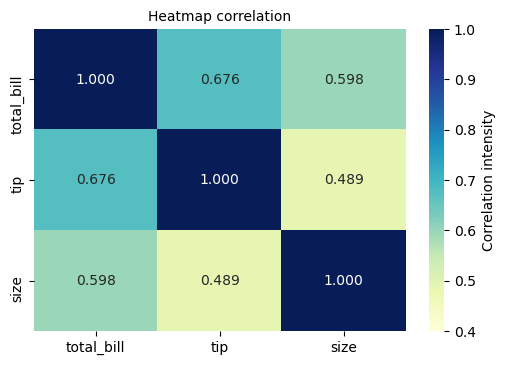

In [4]:
# FIGURE
fig, ax = plt.subplots(dpi=100)

# CUSTOMIZE
ax.set_title('Heatmap correlation', fontsize=10)

# PLOT
sns.heatmap(data=tips.corr(), vmin=0.4, vmax=1, ax=ax, annot=True, 
            fmt='.3f', 
            cmap='YlGnBu', cbar=True, 
            cbar_kws={'label': 'Correlation intensity',
                      'orientation': 'vertical'});


### SCATTER PLOT
---

> A scatterplot in which the values of two variables are plotted along two axes, the pattern of the resulting points   
  reveals **any correlation present, the direction of the correlation, and its intensity**.

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> Podemos observar cómo 'tip' esta positivamente correlacionada con el total de la factura. Es decir, la factura total 'total_bill' incluye la propina y por lo tanto aumenta el total de la factura.  
En el siguiente gráfico desgloso a los clientes entre fumadores y no-fumadores. El párametro 'hue' divide a los fumadores y no fumadores por colores y el párametro 'style' los separa por figuras da una visión mas nítida.  
  
  (Este gráfico se complementa con el 'segundo' punto de Heatmap correlation)

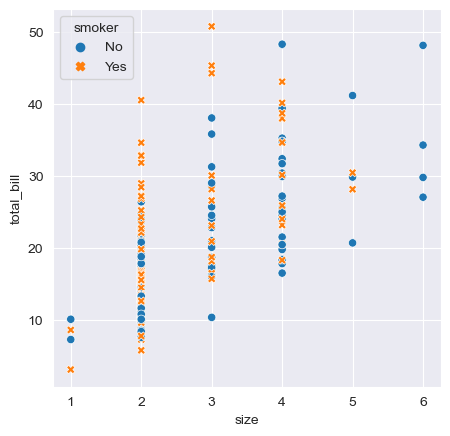

In [16]:
# FGURE
f = plt.figure(figsize=(5, 5), dpi=100)

# sns STYLE
sns.set_style('darkgrid')

# PLOT
sns.scatterplot(data=tips, x='size', y='total_bill', hue='smoker', style='smoker', sizes=200);

> total_bill and tip  
Este scatterplot vemos la correlación de ambas variables. Previamente ya hemos explicado las causas: Tips esta incluido en el total de la factura, es por ello que tiene una correlación positiva. Es decir, cuanto mas sea la propina más aumentará el total de la factura.

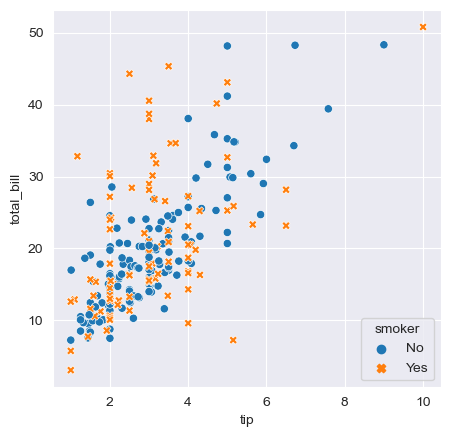

In [17]:
f = plt.figure(figsize=(5, 5), dpi=100)
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='smoker', style='smoker', sizes=200);

> Con stripplot permite separar los datos si es la hora de cenar o comer. Hay mas datos recogidos a la hora de cenar que en cualquier otro momento, por probalidad o lógica podemos pensar o intuir una mayor cantidad de propinas en la cena que la comida.

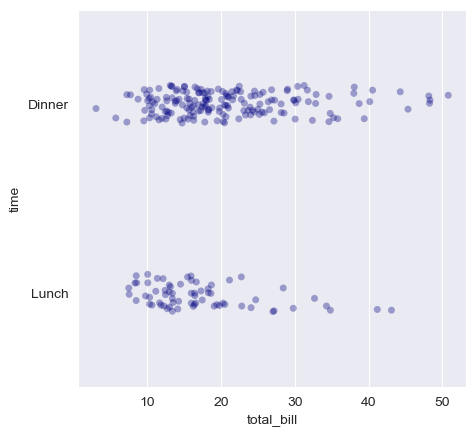

In [18]:
f = plt.figure(figsize=(5, 5), dpi=100)
sns.stripplot(y = "time", x = "total_bill", alpha=0.35,
              color='navy', edgecolor='black',
              data=tips);

### BOX PLOT
---

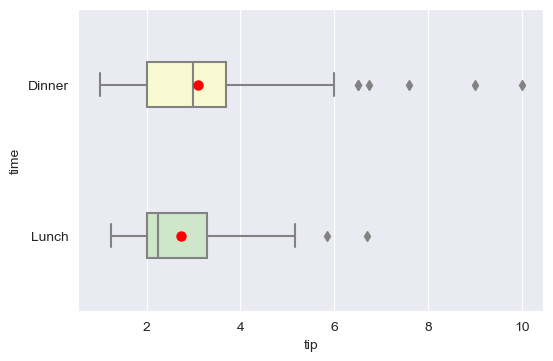

In [20]:
# Figure
plt.figure(dpi=100)

# PLOT
ax1 = sns.boxplot(x="tip", y="time", data=tips, showmeans = True, 
            meanprops={"marker": "o",
                       "markerfacecolor":"r",
                       "markeredgecolor": "red",
                       "markersize": "6.5"},
            orient='h', palette='Pastel1_r',
            width = 0.3,
            notch=False);

+ Graph comparing 'Lunch / Dinner' and amount of 'tip':  
In the graph above we can see how tips are distributed at lunch and dinner. In the graph above we can see how tips are distributed at lunch and dinner. We can see that tips at dinner are concentrated between 2 and almost 4 euro units per table. While at lunchtime it focuses between 2 and 3.5 units of euros per table.  
- The median (*the gray line inside the box*): divides the box plot into two equal parts. This center position parameter indicates 50% below and 50% above. In addition, we can recognize the asymmetry or symmetry of the distribution. As we can see, the boxplot at **dinner** is longer on the left and. This makes me think that the distribution is skewed to the left (negative skew) and more dispersed data. That is, between 25% and 50% of tips are heterogeneous. Another point to take into account of the asymmetry is the 'mean', since in a symmetric distribution the measures of central tendency are equal but it is not fulfilled in this case.

- While at **lunchtime** tips tend to focus more on the bottom 25%. It stands out for its negative asymmetry and very close to the first quartile. That is, 2 monetary units, it has a higher frequency than any other amount of tip. Therefore a tip of 2 monetary units is infimely less dispersed than dinner.